# Litteraturhistorie

Noen momente for Jens Morten

In [1]:
import nbtext as nb
from nbtext import Corpus
%matplotlib inline

In [2]:
def check_navn(navn, limit=2, remove='Ja Nei Unnskyld Ikke Ah Hmm'.split()):
    """Removes all items in navn with frequency below limit and words in all case as well as all words in list 'remove'"""
    r = {x:navn[x] for x in navn if navn[x] > limit and x.upper() != x and not x in remove}
    return r

def check_edges(G, weight=1):
    import networkx as nx
    return nx.Graph([edge for edge in G.edges(data=True) if edge[2]['weight'] >= weight])


# Verkene

Finner noen som starter inneholder `litteraturhistorie`.

In [3]:
bøker = nb.get_urn({'title':'%norges%litteratur%', 'year':1800, 'next':250, 'limit':130})

bøker

[[2008051904054,
  'Paasche, Fredrik',
  'Norges litteratur fra 1814 til 1850-årene',
  1959],
 [2016053048013,
  'Houm, Philip',
  'Norges litteratur fra 1914 til 1950-årene',
  1976],
 [2007021901144, 'Houm, Philip', 'Norges litteratur', 1955],
 [2008051904029,
  'Winsnes, A.H.',
  'Norges litteratur fra 1880-årene til første verdenskrig',
  1961],
 [2011070710006, '', 'Norges nasjonallitteratur', 1967],
 [2007010500138, 'Winsnes, A.H.', 'Norges litteratur', 1937],
 [2007030201038,
  'Bull, Francis',
  'Norges litteratur fra reformasjonen til 1814',
  1958],
 [2007011201040, '', 'Norges litteraturhistorie', 1938],
 [2010092912008, 'Haug, A.', 'Norges nyere litteratur', 1899],
 [2007050401088, '', 'Norges nasjonallitteratur', 1967],
 [2008052201013, '', 'Norges nasjonallitteratur', 1967],
 [2008052304109, 'Dahl, Willy', 'Norges litteratur', 1981],
 [2006120500036, 'Paasche, Fredrik', 'Norges og Islands litteratur', 1924],
 [2007052900021, '', 'Norges nasjonallitteratur', 1967],
 [2007

Velger en bok fra listen over. Ved å legge den i variabelen `bok` kan resten av notebooken kjøres likedan for alle valg. 

In [4]:
book = [2008080804146, 'Rottem, Øystein', 'Norges litteraturhistorie', 1996]

Henter ut kandidatnavn

In [5]:
book_names_raw = nb.navn(book)
print('Number of objects === ', len(list(book_names_raw)), '\nSome examples ======= ', list(book_names_raw)[:20])

Number of objects ===  1128 
Some examples =======  ['A-S', 'AGNAR', 'AKP', 'AKSEL', 'ALFRED', 'AMERIKA', 'ANDERSEN', 'ANDRÉ', 'ANGSTDIKT', 'ANTI-KAPITALISME', 'ARNOLD', 'ASCHEHOUG', 'ASTRID', 'AVSPErLET', 'AXEL', 'AXELJENSEN', 'Aasen', 'Aasmund', 'Abraham', 'Adam']


### Edit names, remove some words

Rerun from here and change parameters

In [6]:
book_names = check_navn(book_names_raw, 5)
print([x for x in book_names])

['Agnar', 'Aksel', 'Alf', 'Alfred', 'Amerika', 'Amundsen', 'Andersen', 'André', 'Anna', 'Arbeiderpartiet', 'Arbeiderpartiets', 'Arne', 'Arnulf', 'Arthur', 'Ask', 'Asks', 'Aslaug', 'Astrid', 'Axel', 'Bang', 'Bang-Hansen', 'Berg', 'Bergen', 'Bergljot', 'Bibelen', 'Bjerke', 'Bjørneboe', 'Bjørneboes', 'Bjørnseth', 'Bleikeplassen', 'Bodvar', 'Borgen', 'Borgens', 'Brannen', 'Brecht', 'Brekke', 'Brekkes', 'Brev', 'Bronken', 'Bruheim', 'Bull', 'Børli', 'Børlis', 'Camus', 'Carl', 'Carling', 'Carlings', 'Christie', 'Christophoros', 'Christov', 'Dagbladet', 'Dahl', 'Danmark', 'Ebba', 'Eggen', 'Egil', 'Eidem', 'Eidslott', 'Einar', 'Elster', 'Englandsfarere', 'Epp', 'Erik', 'Erling', 'Ernst', 'Espen', 'Europa', 'Evensmo', 'Finn', 'Forfatterforeningen', 'Francis', 'Freud', 'Gabriel', 'Georg', 'Grieg', 'Gud', 'Guds', 'Gundersen', 'Gunnar', 'Gunvor', 'Gyldendal', 'Haff', 'Haffs', 'Hagen', 'Hagerup', 'Hagerups', 'Halldis', 'Hallesby', 'Hamsun', 'Hamsuns', 'Harald', 'Haslund', 'Haslunds', 'Hauge', 'Haug

## Lag nettverk over navn

In [7]:
network_raw = nb.make_network(book, book_names)

Fjerner kanter fra grafen som ikke kommer over en viss grense.

In [8]:
network = check_edges(network_raw, weight=2)

# Visualiseringer

En for grafer, og en med ordskyer basert på uttrekk av noder fra grafen.

True

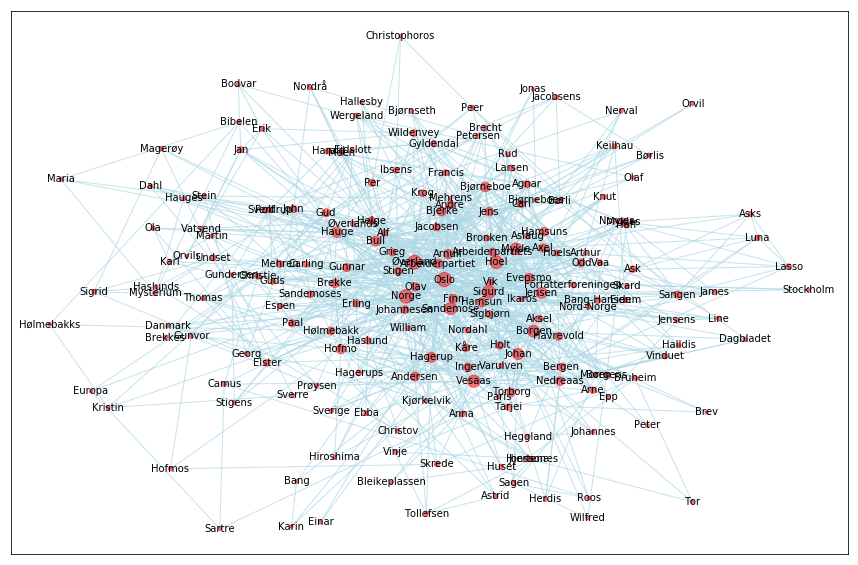

In [9]:
nb.draw_graph_centrality(network, k=0.8, fontsize=10)

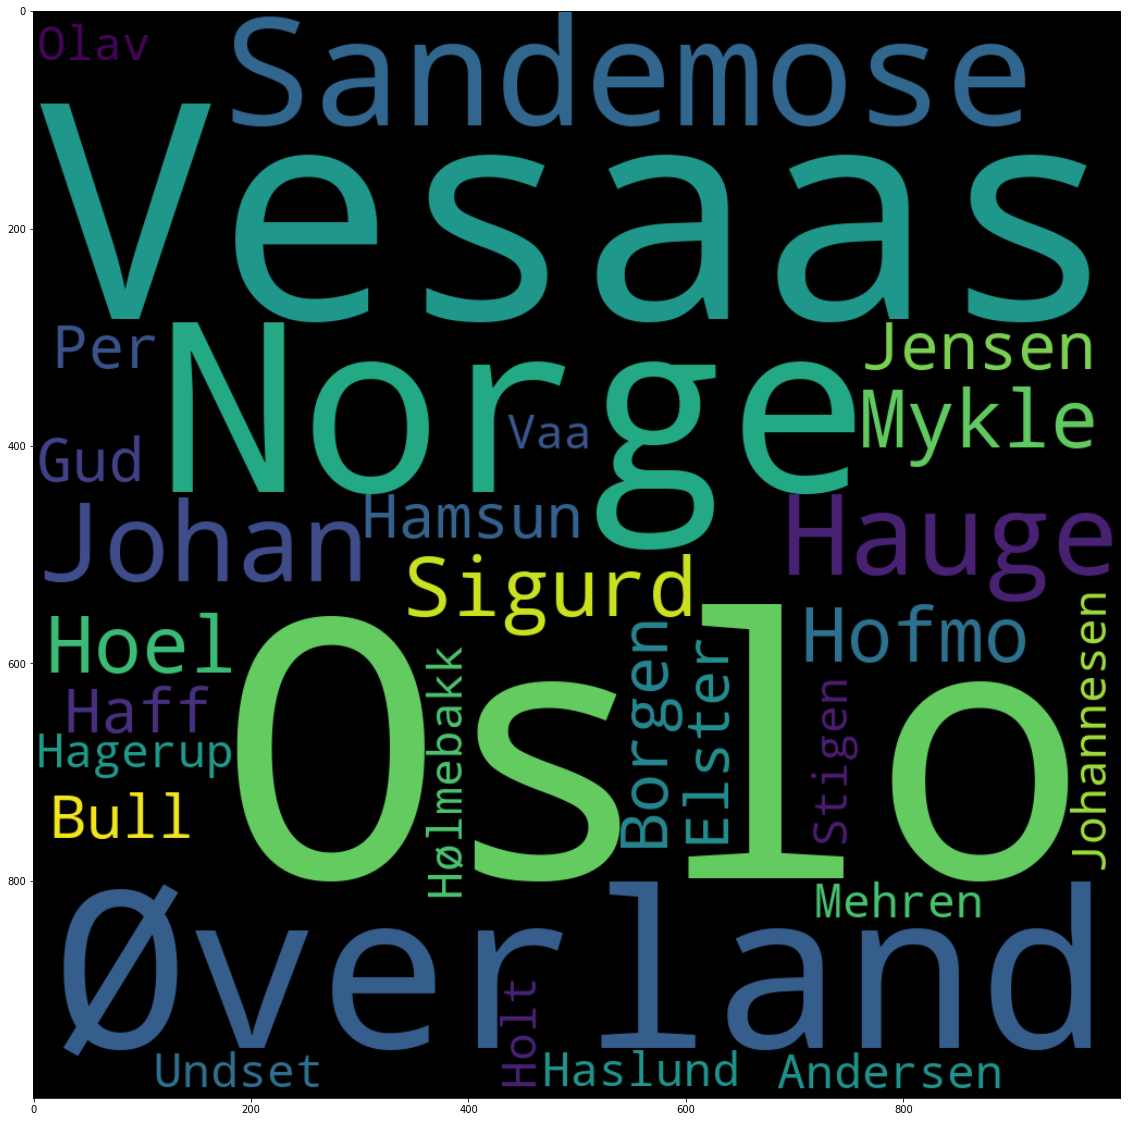

In [10]:
nb.cloud(nb.frame(dict(nb.central_betweenness_characters(network, n=30)),'d'))

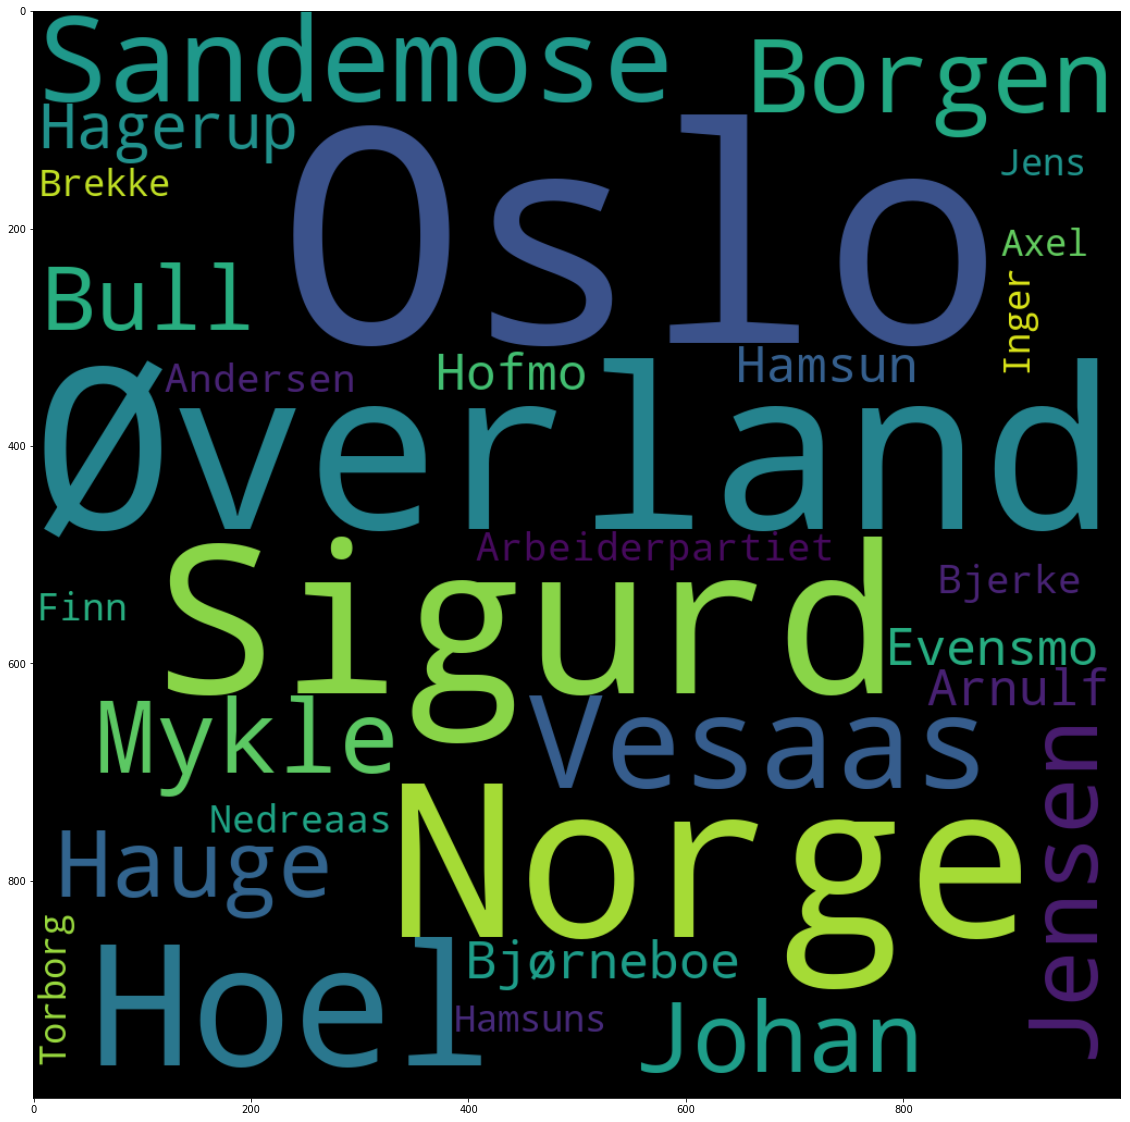

In [12]:
nb.cloud(nb.frame(dict(nb.central_characters(network, n=30)),'d'))